# Digit recognition with CNN architecture

**Digit recognition application with MNIST dataset**

Test loss : 0.034158
Test Accuracy : 0.990299
Train loss : 0.002505
Train Accuracy : 0.999100

In [37]:
# connect to colab

from google.colab import drive 
drive.mount('/content/drive')
%cd drive/
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/'
/content/drive
Accuracy.png  loss.png	mnist_rakam_tanima.ipynb  rakam.jpg  save_models


In [38]:
import os 
os.chdir("/content/drive/My Drive/CNN/rakam_tanima")
!pwd


/content/drive/My Drive/CNN/rakam_tanima


In [39]:
# CPU control

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10390493110744571147
 xla_global_id: -1]

In [40]:
#importing

from __future__ import print_function
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

In [41]:
#Dataset loading

(x_train, y_train), (x_test, y_test) = mnist.load_data()

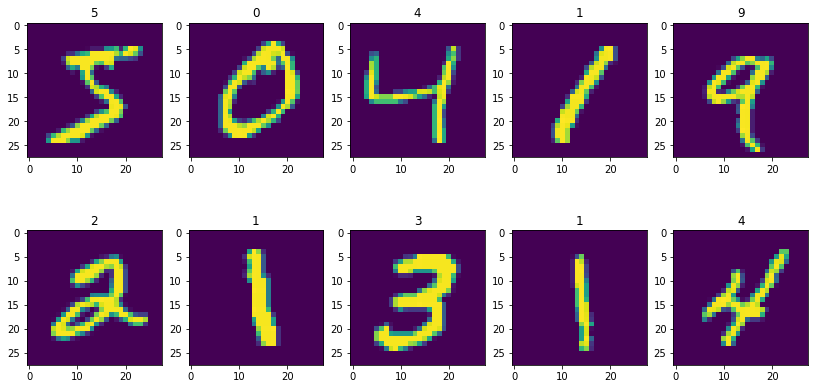

In [42]:
# Visualizing

plt.figure(figsize=(14,7))
for i in range (10):
  plt.subplot(2,5,1+i)
  plt.imshow(x_train[i])
  plt.title(y_train[i])


In [43]:
# Data shape

print("x_train shape :",x_train.shape)
print("y_train shape :",y_train.shape)
print("x_test shape :",x_test.shape)
print("y_test shape :",y_test.shape)

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


In [44]:
#hyperparameters

batch_size= 128
num_classes= 10
epochs= 20


In [45]:
# Data shape

img_rows, img_cols= 28,28

x_train= x_train.reshape(x_train.shape[0], img_rows, img_cols, 1 )
x_test= x_test.reshape(x_test.shape[0], img_rows, img_cols, 1 )

y_train= to_categorical(y_train,num_classes)
y_test= to_categorical(y_test, num_classes)

print("x_train shape :",x_train.shape)
print("y_train shape :",y_train.shape)
print("x_test shape :",x_test.shape)
print("y_test shape :",y_test.shape)



x_train shape : (60000, 28, 28, 1)
y_train shape : (60000, 10)
x_test shape : (10000, 28, 28, 1)
y_test shape : (10000, 10)


In [46]:
# Input Shape

input_shape= x_train[0].shape
input_shape

(28, 28, 1)

In [47]:
# Model create

model= Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                      

In [48]:
# Compile

model.compile(loss= "categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [49]:
# Fitting

hist= model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs= epochs,
                verbose= 1,
                validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 139s 296ms/step - loss: 0.6554 - accuracy: 0.8643 - val_loss: 0.0767 - val_accuracy: 0.9757
Epoch 2/20
469/469 [==============================] - 135s 287ms/step - loss: 0.1567 - accuracy: 0.9531 - val_loss: 0.0572 - val_accuracy: 0.9828
Epoch 3/20
469/469 [==============================] - 136s 290ms/step - loss: 0.1168 - accuracy: 0.9655 - val_loss: 0.0486 - val_accuracy: 0.9855
Epoch 4/20
469/469 [==============================] - 136s 290ms/step - loss: 0.0884 - accuracy: 0.9734 - val_loss: 0.0442 - val_accuracy: 0.9860
Epoch 5/20
469/469 [==============================] - 135s 288ms/step - loss: 0.0796 - accuracy: 0.9755 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 6/20
469/469 [==============================] - 135s 288ms/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.0442 - val_accuracy: 0.9882
Epoch 7/20
469/469 [==============================] - 135s 288ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0430 -

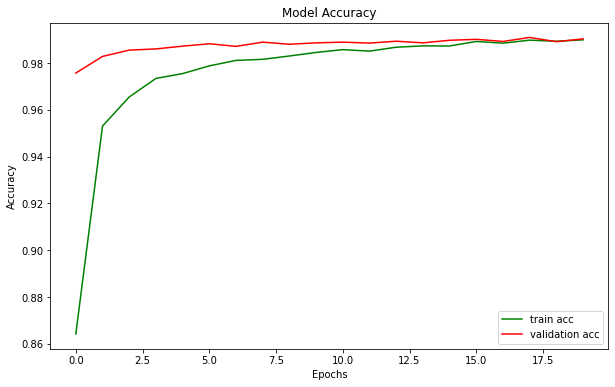

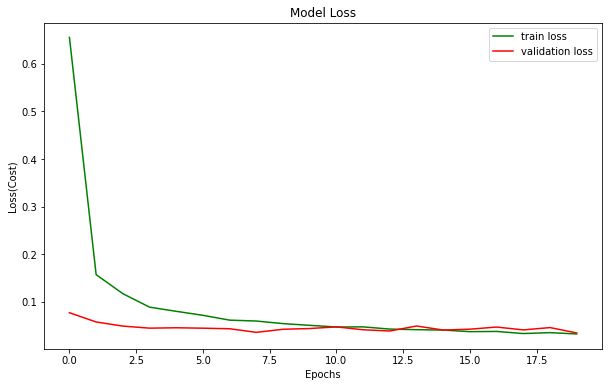

In [50]:
#visualize

plt.figure(figsize=(10,6))

plt.plot(hist.history["accuracy"], label= "train acc", color="g")
plt.plot(hist.history["val_accuracy"], label= "validation acc",color="r")
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig('Accuracy.png')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(hist.history["loss"], label= "train loss",color="g")
plt.plot(hist.history["val_loss"], label= "validation loss",color="r")
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss(Cost)")
plt.savefig('loss.png')
plt.show()

In [51]:
#save
model.save("/mnist_model_20.h5")

In [150]:
# Train-Test score
score=model.evaluate(x_test, y_test, verbose=2)
score1=model.evaluate(x_train, y_train, verbose=2)
print("Test loss :", score[0])
print("Test Accuracy :", score[1] )
print("Train loss :", score1[0])
print("Train Accuracy :", score1[1] )

313/313 - 6s - loss: 0.0342 - accuracy: 0.9903 - 6s/epoch - 20ms/step
1875/1875 - 46s - loss: 0.0025 - accuracy: 0.9991 - 46s/epoch - 24ms/step
Test loss : 0.03415820375084877
Test Accuracy : 0.9902999997138977
Train loss : 0.0025054479483515024
Train Accuracy : 0.9991000294685364


### Predict a random number from the dataset

In [83]:
# Save

model_test= model.save("save_models/mnist_model_20.h5")

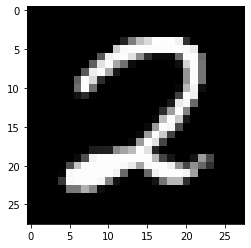

In [145]:
# sample from test dataset

plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255)

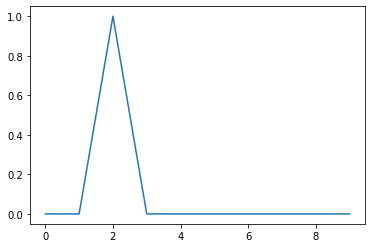

In [146]:
# Reshaping, Predict

test_image= x_test[35]

test_image= test_image.reshape(1,28,28,1)

result= model.predict(test_image)
result= result.reshape(10,1)

plt.plot(result)


### Real world example

In [147]:

#loading test image

from PIL import Image
img = Image.open('/content/drive/My Drive/CNN/rakam_tanima/rakamlar/sekiz.jpg') #for example image size : 28x28x3
img1 = img.convert('L')  #convert a gray scale
img1= img1.resize((28, 28))


In [148]:
# Sizing for predict

real_image = np.expand_dims(img1, axis=-1)
real_image = real_image.reshape(1,28,28,1)
real_image.shape

(1, 28, 28, 1)

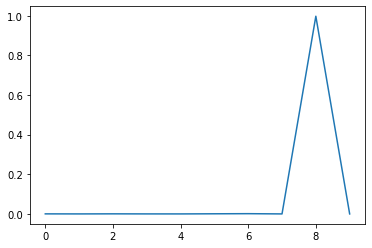

In [149]:
#Predict 

results= model.predict(real_image)
results= results.reshape(10,1)

plt.plot(results)